In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime

In [5]:
def open_and_split(fileName, starting_index):
    dummy = open(fileName, "r")
    length = len(dummy.readlines()) - 1
    dummy.close()
    
    file = open(fileName, "r")
    data = [next(file) for _ in range(length)]
    file.close()

    #divide linens and split the data
    data = [data[i].replace("\n", "") for i in range(len(data))]
    data = [data[i].split() for i in range(len(data))]
    
    #delete first row
    print(f"deleted rows: {data[0]}")
    data = data[starting_index:]
    print(type(data))
    
    return data

#function that filter year
def filter_year(DataFrame, year):
    condition = DataFrame["Year"] == year
    return DataFrame.where(condition).dropna().reset_index().drop("index", axis = 1).drop("Year", axis=1)

#convert Day-Hour to composite
def D_to_C(DataFrame):
    composite = [int(DataFrame["Day"][i]) * 24 + int(DataFrame["Hour"][i]) for i in range(DataFrame.shape[0])]
    
    new = DataFrame.copy()
    new.insert(0, "Time", composite)
    new = new.drop(["Day", "Hour"], axis = 1)
    
    return new

#DLL file with specific columns with conversion of hr:mm to hr
def dll_convert(DataFrame):
    converted = [[int(DataFrame[i][1]), int(DataFrame[i][2][:2]), float(DataFrame[i][6])] for i in range(len(DataFrame))]
    return converted

def standard_units(DataFrame):
    mean_E1 = DataFrame["E(1)"].mean()
    std_E1 = np.std(DataFrame["E(1)"])
    mean_DLL = DataFrame["DLL"].mean()
    std_DLL = np.std(DataFrame["DLL"])
    
    std1 = [((DataFrame["E(1)"][i] - mean_E1) / std_E1) for i in range(len(DataFrame))]
    std2 = [((DataFrame["DLL"][i] - mean_DLL) / std_DLL) for i in range(len(DataFrame))]
    
    return pd.DataFrame({"E(1) STD": std1, "DLL STD": std2})

def correlation_coefficient(dataframe):
    return np.mean(dataframe["E(1) STD"] * dataframe["DLL STD"])

In [6]:
e_filename = "Composite_Index.txt"
data = open_and_split(e_filename, 1)

dll_filename = ["DLL_zenodo_1995_T1h.txt", "DLL_zenodo_1996_T1h.txt", "DLL_zenodo_1997_T1h.txt", 
                "DLL_zenodo_1998_T1h.txt", "DLL_zenodo_1999_T1h.txt", "DLL_zenodo_2000_T1h.txt",
                "DLL_zenodo_2001_T1h.txt", "DLL_zenodo_2002_T1h.txt", "DLL_zenodo_2003_T1h.txt",
                "DLL_zenodo_2008_T1h.txt", "DLL_zenodo_2010_T1h.txt"]

type(data), dll_filename

deleted rows: ['SORT', 'year', 'day', 'hr', 'S(1)', 'E(1)', 'E(1)-E(1)pred', 'Y(1)=log(1+absAL)', 'Y(2)=log(1+absAU)', 'Y(3)=PCI', 'Y(4)=Kp', 'Y(5)=am', 'Y(6)=abs(Dst)', 'Y(7)=log(0.01+Pemean)', 'Y(8)=log(0.01+Pimean)', 'Y(9)=log(0.01+Pips)', 'Y(10)=log(Fe130)', 'Y(11)=exp(-Ssince)', 'Y(12)=abs(Tilt)', 'Y(13)=log(vsw)', 'Y(14)=log(nsw)', 'Y(15)=sin2(theta/2)3', 'Y(16)=-Bz', 'Y(17)=log(Bmag)', 'Y(18)=thetaBn3', 'Y(19)=Rqint10']
<class 'list'>


(list,
 ['DLL_zenodo_1995_T1h.txt',
  'DLL_zenodo_1996_T1h.txt',
  'DLL_zenodo_1997_T1h.txt',
  'DLL_zenodo_1998_T1h.txt',
  'DLL_zenodo_1999_T1h.txt',
  'DLL_zenodo_2000_T1h.txt',
  'DLL_zenodo_2001_T1h.txt',
  'DLL_zenodo_2002_T1h.txt',
  'DLL_zenodo_2003_T1h.txt',
  'DLL_zenodo_2008_T1h.txt',
  'DLL_zenodo_2010_T1h.txt'])

In [7]:
r = []
combines_row = []
combines_std = []

for i in range(len(dll_filename) - 2):
    
    #DLL
    filename = dll_filename[i]
    year = int(filename[11:15])

    dll_row = open_and_split(filename, 21)
    dll_row_selected = dll_convert(dll_row)
    
    dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
    dll = D_to_C(dll)
    
    grouped_dll = dll.groupby("Time").mean()
    
    #E(1)
    selected_data = [[int(data[i][1]), int(data[i][2]), int(data[i][3]), float(data[i][5])] for i in range(len(data))]
    E_1_data = pd.DataFrame(selected_data, columns = ["Year", "Day", "Hour", "E(1)"])

    E1 = filter_year(E_1_data, year)
    E1 = D_to_C(E1).groupby("Time").mean()
    
    combined = pd.merge(left=E1, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
    
    std = standard_units(combined)
    
    val = correlation_coefficient(std)
    print(val)
    
    r.append(val)
    combines_row.append(combined)
    combines_std.append(std)

print(f"mean: {np.mean(r)}, std: {np.std(np.std(r))}")
r

deleted rows: ['****************************************************************************************']
<class 'list'>
0.5454285728501069
deleted rows: ['****************************************************************************************']
<class 'list'>
0.39761041284515386
deleted rows: ['****************************************************************************************']
<class 'list'>
0.5383456349941017
deleted rows: ['****************************************************************************************']
<class 'list'>
0.5757459979912657
deleted rows: ['****************************************************************************************']
<class 'list'>
0.5843200954472245
deleted rows: ['****************************************************************************************']
<class 'list'>
0.6152050991752336
deleted rows: ['****************************************************************************************']
<class 'list'>
0.6137516890475934
deleted rows

[0.5454285728501069,
 0.39761041284515386,
 0.5383456349941017,
 0.5757459979912657,
 0.5843200954472245,
 0.6152050991752336,
 0.6137516890475934,
 0.5922545547604706,
 0.5817511190213353]

In [8]:
r

[0.5454285728501069,
 0.39761041284515386,
 0.5383456349941017,
 0.5757459979912657,
 0.5843200954472245,
 0.6152050991752336,
 0.6137516890475934,
 0.5922545547604706,
 0.5817511190213353]

Text(0.5, 0.98, 'E(1) vs DLL 1995')

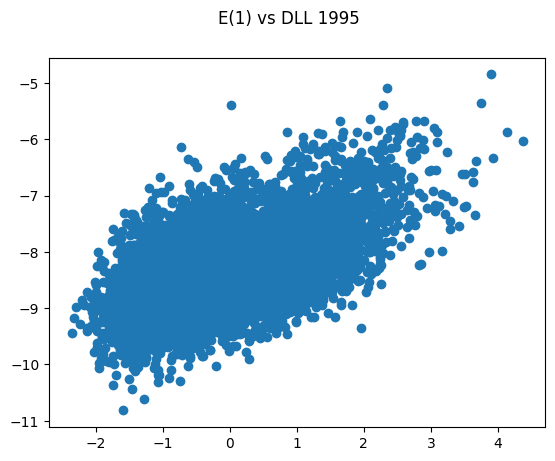

In [9]:
plt.scatter("E(1)", "DLL", data = combines_row[0])
plt.suptitle("E(1) vs DLL 1995")

Text(0.5, 0.98, 'E(1) vs DLL 1996')

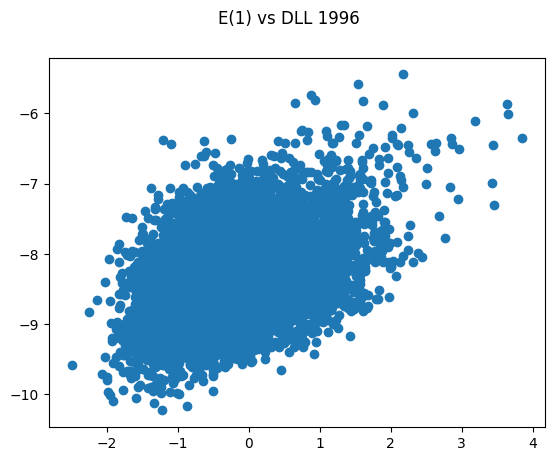

In [10]:
plt.scatter("E(1)", "DLL", data = combines_row[1])
plt.suptitle("E(1) vs DLL 1996")

Text(0.5, 0.98, 'E(1) vs DLL 1997')

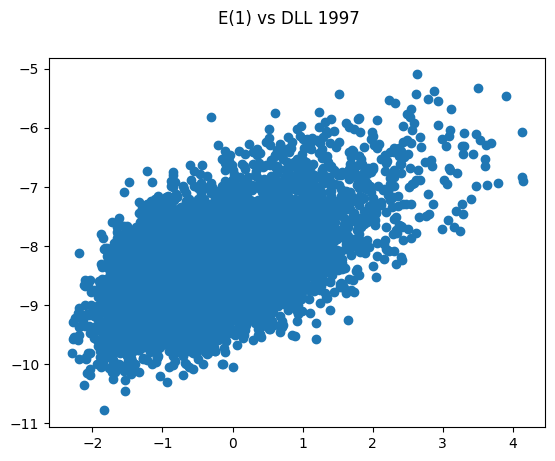

In [11]:
plt.scatter("E(1)", "DLL", data = combines_row[2])
plt.suptitle("E(1) vs DLL 1997")

Text(0.5, 0.98, 'E(1) vs DLL 1998')

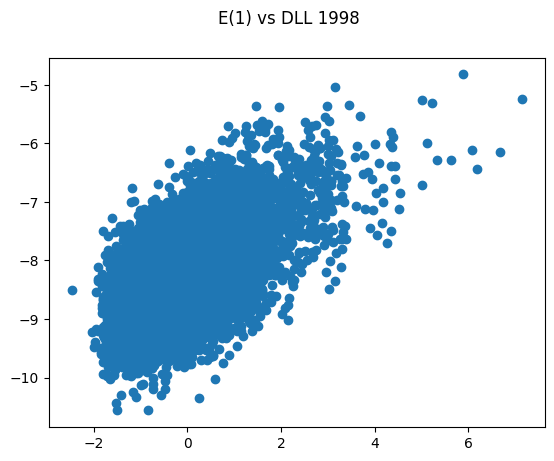

In [12]:
plt.scatter("E(1)", "DLL", data = combines_row[3])
plt.suptitle("E(1) vs DLL 1998")

Text(0.5, 0.98, 'E(1) vs DLL 1999')

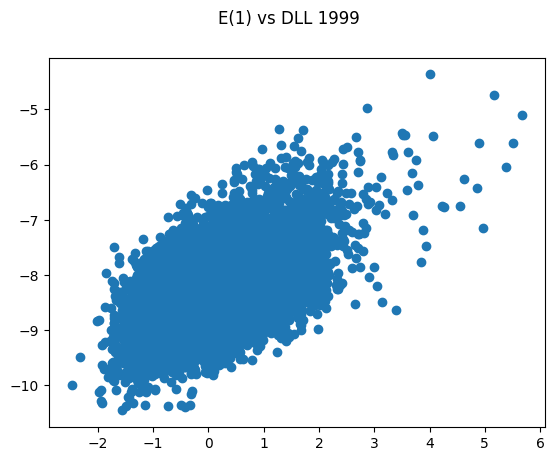

In [13]:
plt.scatter("E(1)", "DLL", data = combines_row[4])
plt.suptitle("E(1) vs DLL 1999")

Text(0.5, 0.98, 'E(1) vs DLL 2000')

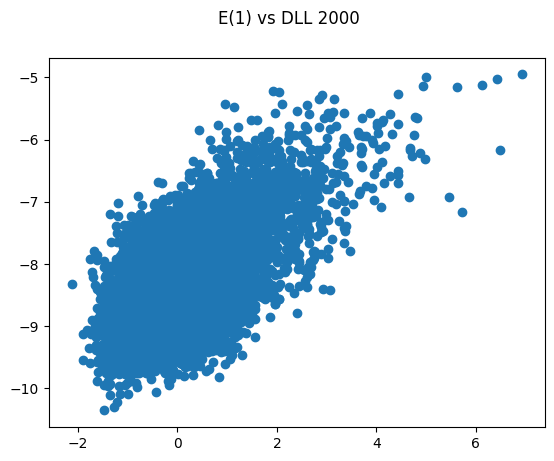

In [14]:
plt.scatter("E(1)", "DLL", data = combines_row[5])
plt.suptitle("E(1) vs DLL 2000")

Text(0.5, 0.98, 'E(1) vs DLL 2001')

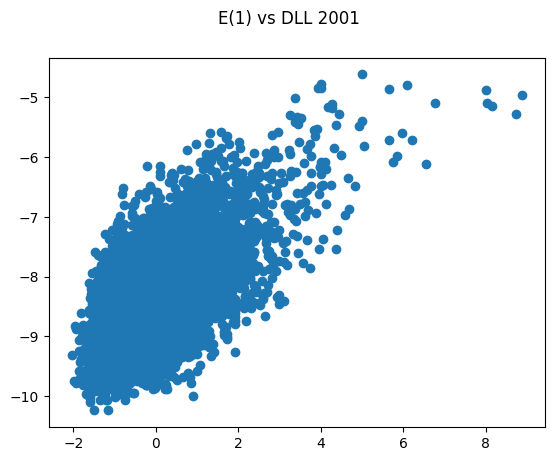

In [15]:
plt.scatter("E(1)", "DLL", data = combines_row[6])
plt.suptitle("E(1) vs DLL 2001")

Text(0.5, 0.98, 'E(1) vs DLL 2002')

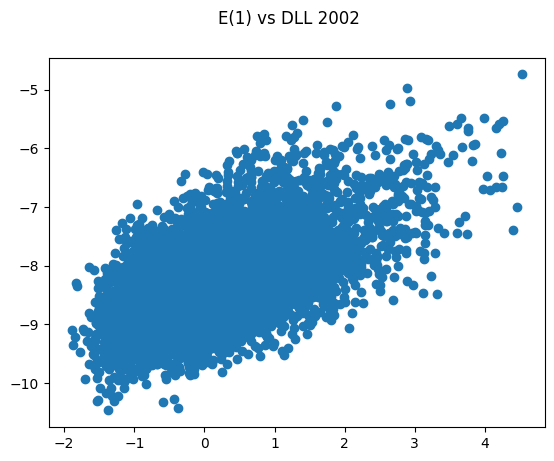

In [16]:
plt.scatter("E(1)", "DLL", data = combines_row[7])
plt.suptitle("E(1) vs DLL 2002")

Text(0.5, 0.98, 'E(1) vs DLL 2003')

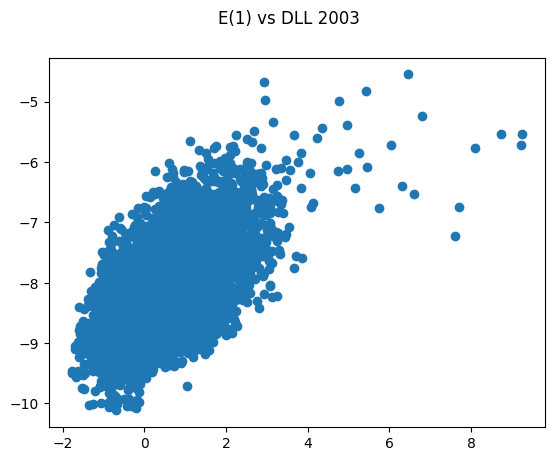

In [17]:
plt.scatter("E(1)", "DLL", data = combines_row[8])
plt.suptitle("E(1) vs DLL 2003")

Text(0.5, 0.98, 'E(1) STD vs DLL 1995 STD')

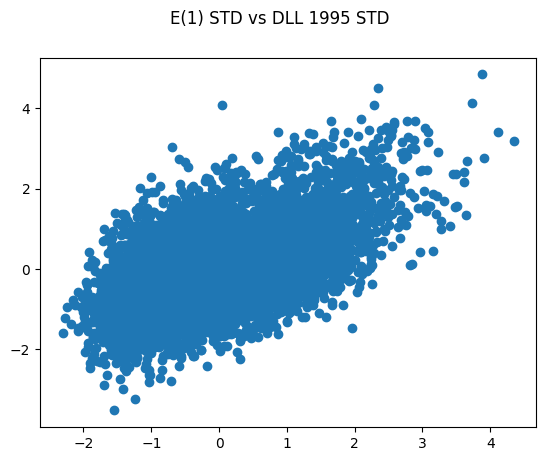

In [18]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[0])
plt.suptitle("E(1) STD vs DLL 1995 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 1996 STD')

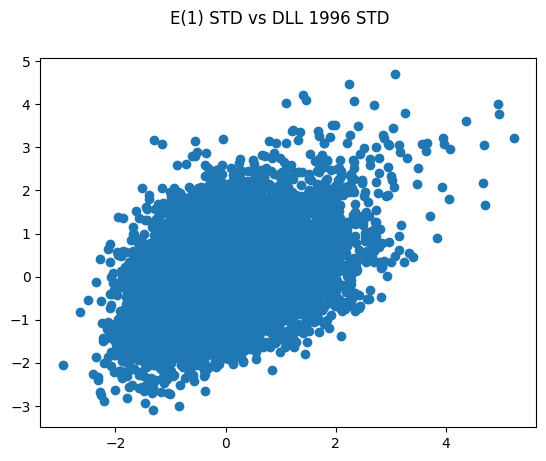

In [19]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[1])
plt.suptitle("E(1) STD vs DLL 1996 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 1997 STD')

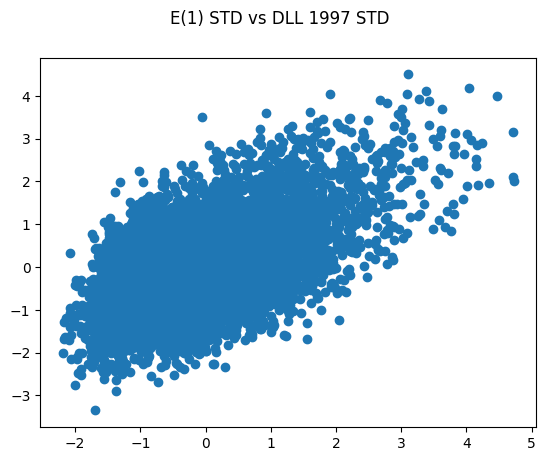

In [20]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[2])
plt.suptitle("E(1) STD vs DLL 1997 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 1998 STD')

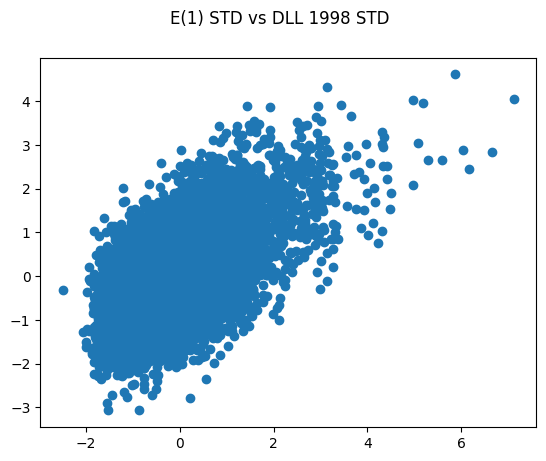

In [21]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[3])
plt.suptitle("E(1) STD vs DLL 1998 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 1999 STD')

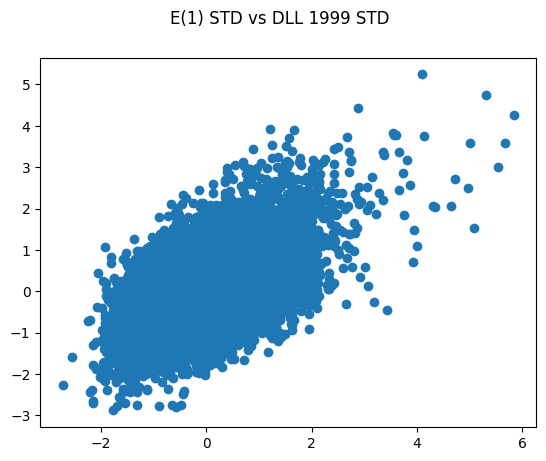

In [22]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[4])
plt.suptitle("E(1) STD vs DLL 1999 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 2000 STD')

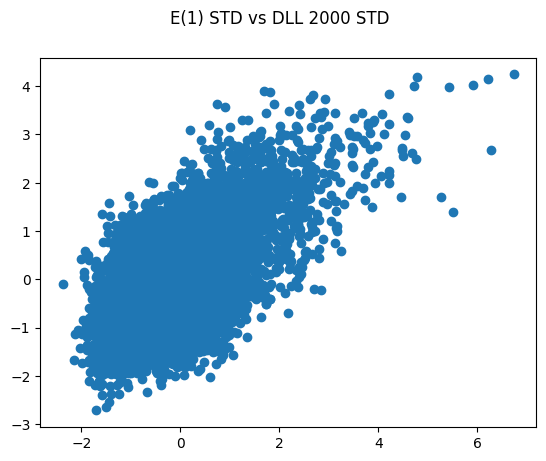

In [23]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[5])
plt.suptitle("E(1) STD vs DLL 2000 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 2001 STD')

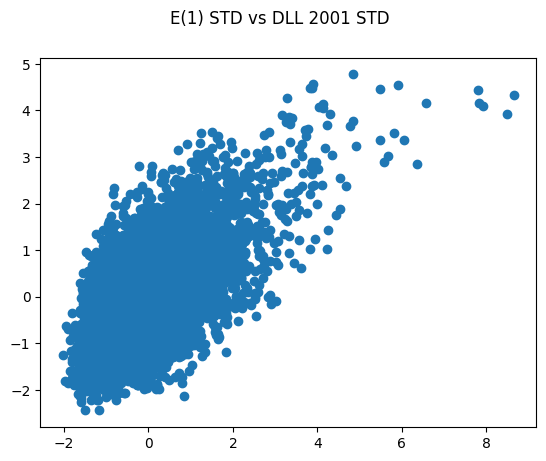

In [24]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[6])
plt.suptitle("E(1) STD vs DLL 2001 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 2002 STD')

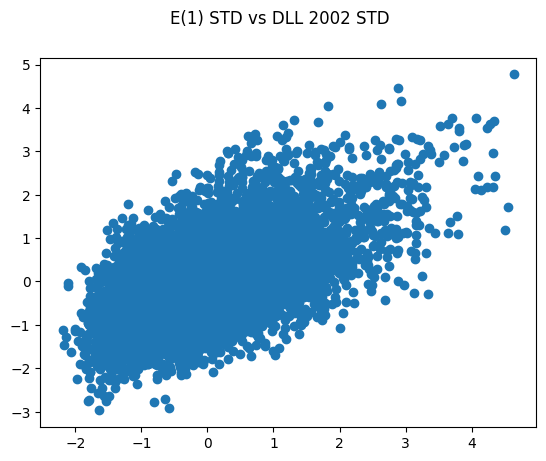

In [25]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[7])
plt.suptitle("E(1) STD vs DLL 2002 STD")

Text(0.5, 0.98, 'E(1) STD vs DLL 2003 STD')

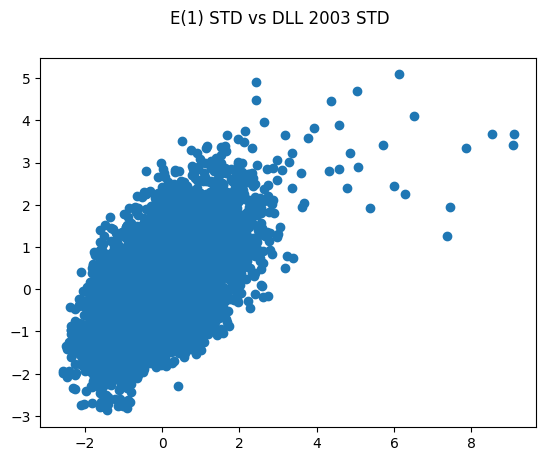

In [26]:
plt.scatter("E(1) STD", "DLL STD", data = combines_std[8])
plt.suptitle("E(1) STD vs DLL 2003 STD")

Text(0.5, 0.98, 'E(1) vs DLL total')

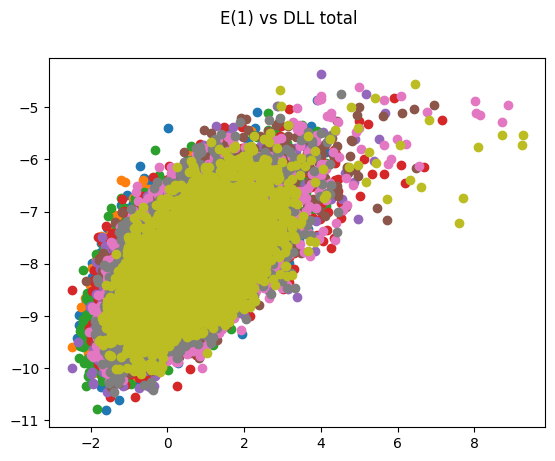

In [27]:
for i in range(len(combines_row)):
    plt.scatter("E(1)", "DLL", data = combines_row[i])
plt.suptitle("E(1) vs DLL total")

Text(0.5, 0.98, 'E(1) STD vs DLL STD total')

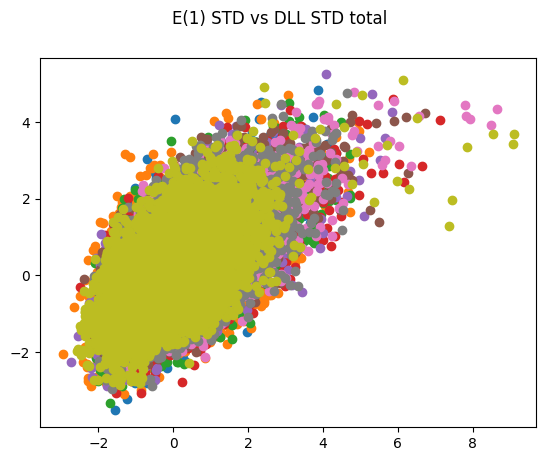

In [28]:
for i in range(len(combines_std)):
    plt.scatter("E(1) STD", "DLL STD", data = combines_std[i])
plt.suptitle("E(1) STD vs DLL STD total")

In [29]:
from sklearn.linear_model import LinearRegression

In [32]:
filename = "DLL_zenodo_1995_T1h.txt"
year = int(filename[11:15])

dll_row = open_and_split(filename, 21)
dll_row_selected = dll_convert(dll_row)
    
dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
dll = D_to_C(dll)
    
grouped_dll = dll.groupby("Time").mean()

grouped_dll = grouped_dll.reset_index()
grouped_dll

deleted rows: ['****************************************************************************************']
<class 'list'>


,Time,DLL
0,28,-9.117692
1,30,-9.576429
2,31,-8.836842
3,32,-8.737458
4,35,-7.578333
...,...,...
7963,8779,-7.786724
7964,8780,-8.430000
7965,8781,-8.360167
7966,8782,-8.144444


In [41]:
selected_data = [[int(data[i][1]), int(data[i][2]), int(data[i][3]), float(data[i][5])] for i in range(len(data))]
E_1_data = pd.DataFrame(selected_data, columns = ["Year", "Day", "Hour", "E(1)"])

E1 = filter_year(E_1_data, 1995)
E1 = D_to_C(E1).groupby("Time").mean().reset_index()
    
combined = pd.merge(left=E1, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
combined = combined.drop(["Time", "index"], axis=1)
combined

,E(1),DLL
0,-0.097706,-7.578333
1,-0.482400,-7.760000
2,-0.794660,-8.014667
3,-0.944370,-8.521724
4,-1.011900,-9.042500
...,...,...
7135,-0.920410,-8.743559
7136,-1.243300,-8.994561
7137,-1.245700,-8.497759
7138,-1.556000,-9.122778


In [51]:
x = []
y = []

for i in range(len(combined)):
    x.append([combined["E(1)"][i]])
    y.append([combined["DLL"][i]])

x_arr, y_arr = np.array(x), np.array(y)

x_arr,y_arr

(array([[-0.097706],
        [-0.4824  ],
        [-0.79466 ],
        ...,
        [-1.2457  ],
        [-1.556   ],
        [-1.2838  ]]),
 array([[-7.57833333],
        [-7.76      ],
        [-8.01466667],
        ...,
        [-8.49775862],
        [-9.12277778],
        [-8.8422807 ]]))

In [52]:
model = LinearRegression().fit(x_arr, y_arr)

In [53]:
r_sq = model.score(x_arr, y_arr)
print(f"coefficient of determination: {r_sq}")

intercept = model.intercept_
print(f"intercept: {intercept}")

coefficients = model.coef_
print(f"coefficients: {coefficients}")

coefficient of determination: 0.29749232808130444
intercept: [-8.29279436]
coefficients: [[0.38413788]]


In [58]:
errors_row = model.predict(x) - y
errors = []

for i in range(len(errors_row)):
    errors.append(errors_row[i][0])

errors

[-0.7519936016740978,
 -0.7181024738784716,
 -0.5833867026452442,
 -0.13383851388693024,
 0.360996516924045,
 0.810111202110507,
 0.7478187609470375,
 -0.4036019899316603,
 -1.627377353013073,
 -0.23910263905634999,
 0.22077371120149536,
 -0.062293638431240694,
 -0.1905814173825533,
 -0.380953764978436,
 -0.6278124578698527,
 -0.9904961291828736,
 -1.1110939982346038,
 -1.5901721764741916,
 -0.642574782389266,
 -0.2687188873907953,
 -0.2864426898642005,
 -0.42508151050550236,
 -0.37138797383839695,
 -0.8692087949788698,
 -1.5123382146703133,
 -1.413654402156678,
 0.019433669128146036,
 0.6390220719917501,
 0.6203225540292951,
 0.44378867968762936,
 -0.18409478889779152,
 -0.13804615699509615,
 0.03470672314820167,
 0.23544296682743404,
 -0.43215886126766545,
 -0.7978932388677249,
 -0.3620361399315106,
 0.36178978152184804,
 -0.23754138207074327,
 0.49104538307813517,
 0.30736932886694746,
 0.4996072029198295,
 0.545548751567086,
 0.26945481354305123,
 -0.5035282272022537,
 0.2784978139

In [59]:
errorData = pd.DataFrame({"DLL Vals": y, "Errors": errors})
errorData

,DLL Vals,Errors
0,[-7.578333333333333],-0.751994
1,[-7.760000000000001],-0.718102
2,[-8.014666666666667],-0.583387
3,[-8.521724137931033],-0.133839
4,[-9.042499999999999],0.360997
...,...,...
7135,[-8.743559322033901],0.097201
7136,[-8.994561403508769],0.224168
7137,[-8.497758620689655],-0.273556
7138,[-9.122777777777777],0.232265


Text(0, 0.5, 'Errors')

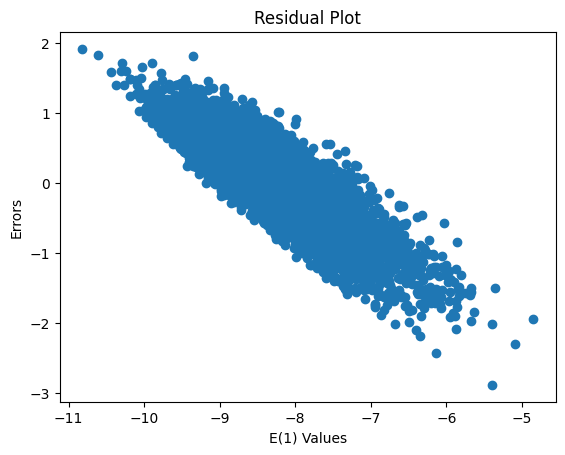

In [61]:
plt.scatter(x = y, y = errors)
plt.title("Residual Plot")
plt.xlabel("E(1) Values")
plt.ylabel("Errors")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>